In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('Dataset of Heart failure Prediction.csv') 
df=df.drop_duplicates()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [3]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

labelencoder = LabelEncoder()
df['ChestPainType'] = labelencoder.fit_transform(df['ChestPainType'])

labelencoder = LabelEncoder()
df['RestingECG'] = labelencoder.fit_transform(df['RestingECG'])

labelencoder = LabelEncoder()
df['ST_Slope'] = labelencoder.fit_transform(df['ST_Slope'])

labelencoder = LabelEncoder()
df['ExerciseAngina'] = labelencoder.fit_transform(df['ExerciseAngina'])

In [4]:
from sklearn.preprocessing import StandardScaler
# Select the numerical columns to be standardized
numerical_columns = ['RestingBP', 'Cholesterol', 'MaxHR']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,0.410909,0.825070,0,1,1.382928,0,0.0,2,0
1,49,0,2,1.491752,-0.171961,0,1,0.754157,0,1.0,1,1
2,37,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.0,2,0
3,48,0,0,0.302825,0.139040,0,1,-1.132156,1,1.5,1,1
4,54,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.0,2,0


In [6]:
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, train_size=0.70,random_state=42)

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


logistic_regression = LogisticRegression(max_iter=1000)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True)

# Create a fusion classifier using VotingClassifier
fusion_classifier = VotingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('nb', naive_bayes),
        ('knn', knn),
        ('svm', svm)
    ],
    voting='hard'  # You can choose 'hard' or 'soft' voting
)

# Fit the fusion classifier on the training data
fusion_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_fusion = fusion_classifier.predict(X_test)

# Calculate the accuracy of the fusion classifier
accuracy = accuracy_score(y_test, y_pred_fusion)
print("Accuracy:", accuracy)


Accuracy: 0.9528985507246377


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
acc = accuracy_score(y_test, y_pred_fusion)
print("Accuracy: ", acc)

# Precision
precision = precision_score(y_test, y_pred_fusion, average='macro')
print("Precision: ", precision)

# Recall
recall = recall_score(y_test, y_pred_fusion, average='macro')
print("Recall: ", recall)

# F1-score
f1 = f1_score(y_test, y_pred_fusion, average='macro')
print("F1-score: ", f1)

# MCC
cm = confusion_matrix(y_test, y_pred_fusion)
mcc = matthews_corrcoef(y_test, y_pred_fusion)
print("MCC: ", mcc)
print("Confusion Matrix : ", cm)
print("\n")

Accuracy:  0.9528985507246377
Precision:  0.948
Recall:  0.9603658536585367
F1-score:  0.9519389190275267
MCC:  0.9082816797426323
Confusion Matrix :  [[112   0]
 [ 13 151]]




In [10]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fusion).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Print the specificity
print("Specificity:", specificity)


Specificity: 1.0


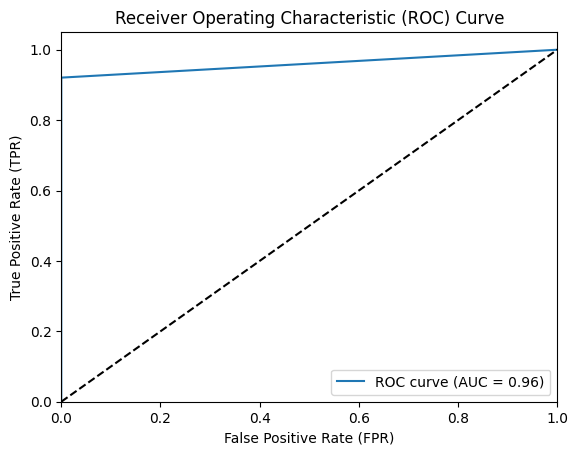

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_fusion)
auc = roc_auc_score(y_test, y_pred_fusion)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
